# Scikit-Learn ML Prediction 

    Car sales prediction model: regression   
        - groupby, bar chart, heatmap 
        - one way ANOVA test, p-value
        - pipeline (regresion model)
        - metrics, loss fonction
     

* Based off (and directly taken from) the quick [introduction to Scikit-Learn notebook](https://github.com/mrdbourke/zero-to-mastery-ml/blob/master/section-2-data-science-and-ml-tools/introduction-to-scikit-learn.ipynb) -  with some additions

# Car sales prediction model 
    Scikit-Learn Regression Practice


In [1]:
# Setup matplotlib to plot inline (within the notebook)
%matplotlib inline 
# Import the pyplot module of Matplotlib as plt

import matplotlib.pyplot as plt
# Import pandas under the abbreviation 'pd'

import pandas as pd 
# Import NumPy under the abbreviation 'np'

import numpy as np 

In [40]:
# Read in the car sales data
car_sales = pd.read_csv("https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/car-sales-extended-missing-data.csv")


In [41]:
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [47]:
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 950 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Make           903 non-null    object 
 1   Colour         904 non-null    object 
 2   Odometer (KM)  902 non-null    float64
 3   Doors          903 non-null    float64
 4   Price          950 non-null    float64
dtypes: float64(3), object(2)
memory usage: 44.5+ KB


In [42]:
# Get information about the car sales DataFrame
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Make           951 non-null    object 
 1   Colour         950 non-null    object 
 2   Odometer (KM)  950 non-null    float64
 3   Doors          950 non-null    float64
 4   Price          950 non-null    float64
dtypes: float64(3), object(2)
memory usage: 39.2+ KB


In [43]:
# Find number of missing values in each column
car_sales.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [44]:
# Find the datatypes of each column of car_sales
car_sales.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

Taking care of  some missing data

In [46]:
# Remove rows with no labels (NaN's in the Price column)
car_sales.dropna(subset=['Price'], inplace=True)

In [72]:
#Group columns of the car sales DataFrame by the Make column and find the average
car_sales.groupby(['Make']).mean(numeric_only=True)

,Odometer (KM),Doors,Price
Make,,,
BMW,129898.563218,4.528090,26902.440860
Honda,123234.906367,4.000000,14618.661922
Nissan,135896.920732,3.772455,13664.502857
Toyota,136779.076696,4.000000,15715.257062


## Visualizations 

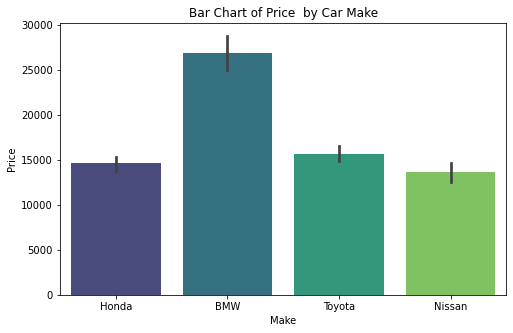

In [70]:
# Bar Chart
plt.figure(figsize=(8, 5))
sns.barplot(x='Make', y='Price', data=car_sales, palette='viridis')
plt.title('Bar Chart of Price  by Car Make')
plt.show()

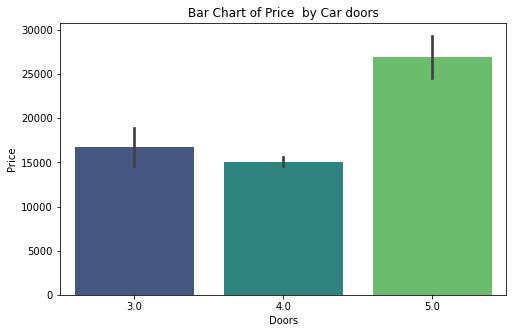

In [71]:
# Bar Chart
plt.figure(figsize=(8, 5))
sns.barplot(x='Doors', y='Price', data=car_sales, palette='viridis')
plt.title('Bar Chart of Price  by Car doors')
plt.show()

## Heatmap 

car sales factors


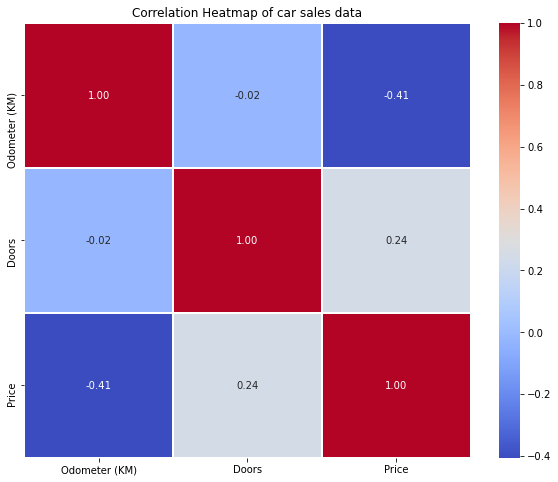

In [101]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Create a DataFrame
df_car_sales = pd.DataFrame(car_sales)

# Display the DataFrame
print("car sales factors")

# Check if the DataFrame contains numeric data for the heatmap
# Use a correlation matrix for numeric data
correlation_matrix = df_car_sales.corr()

# Draw the heatmap
plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of car sales data")
plt.show()


There is a slight positive correlation between the nb of doors and price, while there is an inverse correlation betweem Odometer and price.

## One-way ANOVA test and p-value 

In [83]:
from scipy.stats import f_oneway
import pandas as pd

# Assuming 'car_sales' is a dataset that already exists
# Convert it into a DataFrame
df_car_sales = pd.DataFrame(car_sales)

# Significance level
alpha = 0.05

# Group data by categories (Make)
groups = [df_car_sales[df_car_sales['Make'] == cat]['Price'] for cat in df_car_sales['Make'].unique()]

# Perform ANOVA
f_stat, p_value = f_oneway(*groups)

# Display the results
print("F-Statistic:", f_stat)
print("P-Value:", p_value)

if p_value < alpha:
    print("Reject the null hypothesis: At least one group mean is significantly different.")
else:
    print("Fail to reject the null hypothesis: No significant difference between the group means.")


F-Statistic: nan
P-Value: nan
Fail to reject the null hypothesis: No significant difference between the group means.


A p-value <0.05 is considered significant → there is a significant difference in prices between the various car Makes.

## Building a pipeline


In [48]:
# Import Pipeline from sklearn's pipeline module
from sklearn.pipeline import Pipeline

# Import ColumnTransformer from sklearn's compose module
from sklearn.compose import ColumnTransformer

# Import SimpleImputer from sklearn's impute module
from sklearn.impute import SimpleImputer

# Import OneHotEncoder from sklearn's preprocessing module
from sklearn.preprocessing import OneHotEncoder

# Import train_test_split from sklearn's model_selection module
from sklearn.model_selection import train_test_split

Create a preprocessing `Pipeline` which fills missing values along with turning all non-numerical data into numbers.


In [49]:
# Define different categorical features 
categorical_features = ["Make", "Colour"]

# Create categorical transformer Pipeline
categorical_transformer = Pipeline(steps=[
    # Set SimpleImputer strategy to "constant" and fill value to "missing"
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    # Set OneHotEncoder to ignore the unknowns
    ("onehot", OneHotEncoder(handle_unknown="ignore"))])

In [50]:
# Define Doors features
door_feature = ["Doors"]

# Create Doors transformer Pipeline
door_transformer = Pipeline(steps=[
    # Set SimpleImputer strategy to "constant" and fill value to 4
    ("imputer", SimpleImputer(strategy="constant", fill_value=4))])

In [51]:
# Define numeric features (only the Odometer (KM) column)
numeric_features = ["Odometer (KM)"]

# Crearte numeric transformer Pipeline
numeric_transformer = Pipeline(steps=[
    # Set SimpleImputer strategy to fill missing values with the "Median"
    ("imputer", SimpleImputer(strategy="median"))])

In [52]:
# Setup preprocessing steps (fill missing values, then convert to numbers)
preprocessor = ColumnTransformer(
    transformers=[
        # Use the categorical_transformer to transform the categorical_features
        ("cat", categorical_transformer, categorical_features),
        # Use the door_transformer to transform the door_feature
        ("door", door_transformer, door_feature),
        # Use the numeric_transformer to transform the numeric_features
        ("num", numeric_transformer, numeric_features)])

In [53]:
# Import Ridge from sklearn's linear_model module
from sklearn.linear_model import Ridge

# Import SVR from sklearn's svm module
from sklearn.svm import SVR

# Import RandomForestRegressor from sklearn's ensemble module
from sklearn.ensemble import RandomForestRegressor

In [54]:
# Create dictionary of model instances, there should be 4 total key, value pairs
# in the form {"model_name": model_instance}.
# Don't forget there's two versions of SVR, one with a "linear" kernel and the
# other with kernel set to "rbf".
regression_models = {"Ridge": Ridge(),
                     "SVR_linear": SVR(kernel="linear"),
                     "SVR_rbf": SVR(kernel="rbf"),
                     "RandomForestRegressor": RandomForestRegressor()}

# Create an empty dictionary for the regression results
regression_results = {}

### Regression model 

In [55]:
# Create car sales X data (every column of car_sales except Price)
car_sales_X = car_sales.drop("Price", axis=1)

# Create car sales y data (the Price column of car_sales)
car_sales_y = car_sales["Price"]

In [56]:
# Use train_test_split to split the car_sales_X and car_sales_y data into 
# training and test sets.
# Give the test set 20% of the data using the test_size parameter.
# For reproducibility set the random_state parameter to 42.
car_X_train, car_X_test, car_y_train, car_y_test = train_test_split(car_sales_X,
                                                                    car_sales_y,
                                                                    test_size=0.2,
                                                                    random_state=42)

# Check the shapes of the training and test datasets
car_X_train.shape, car_X_test.shape, car_y_train.shape, car_y_test.shape

((760, 4), (190, 4), (760,), (190,))

Building a small loop which is going to:
1. Go through the `regression_models` dictionary
2. Create a `Pipeline` which contains the `preprocessor` as well as one of the models in the dictionary
3. Fits the `Pipeline` to the car sales training data
4. Evaluates the target model on the car sales test data and appends the results to our `regression_results` dictionary

In [57]:
# Loop through the items in the regression_models dictionary
for model_name, model in regression_models.items():
    
    # Create a model Pipeline with a preprocessor step and model step
    model_pipeline = Pipeline(steps=[("preprocessor", preprocessor),
                                      ("model", model)])
    
    # Fit the model Pipeline to the car sales training data
    print(f"Fitting {model_name}...")
    model_pipeline.fit(car_X_train, car_y_train)
    
    # Score the model Pipeline on the test data appending the model_name to the 
    # results dictionary
    print(f"Scoring {model_name}...")
    regression_results[model_name] = model_pipeline.score(car_X_test, 
                                                          car_y_test)

Fitting Ridge...
Scoring Ridge...
Fitting SVR_linear...
Scoring SVR_linear...
Fitting SVR_rbf...
Scoring SVR_rbf...
Fitting RandomForestRegressor...
Scoring RandomForestRegressor...


In [58]:
# Check the results of each regression model by printing the regression_results
# dictionary
regression_results

{'Ridge': 0.2540261105794386,
 'SVR_linear': -0.489452821008145,
 'SVR_rbf': 0.0018546241516633755,
 'RandomForestRegressor': 0.2291358152962253}

Metrics 

In [59]:
# Import mean_absolute_error from sklearn's metrics module
from sklearn.metrics import mean_absolute_error

# Import mean_squared_error from sklearn's metrics module
from sklearn.metrics import mean_squared_error

# Import r2_score from sklearn's metrics module
from sklearn.metrics import r2_score

Creating a `Pipeline` with the `preprocessor` and a `Ridge()` model, fitting it on the car sales training data and then making predictions on the car sales test data.

In [60]:
# Create RidgeRegression Pipeline with preprocessor as the "preprocessor" and
# Ridge() as the "model".
ridge_pipeline = Pipeline(steps=[("preprocessor", preprocessor),
                                 ("model", Ridge())])

# Fit the RidgeRegression Pipeline to the car sales training data
ridge_pipeline.fit(car_X_train, car_y_train)

# Make predictions on the car sales test data using the RidgeRegression Pipeline
car_y_preds = ridge_pipeline.predict(car_X_test)

# View the first 50 predictions
car_y_preds[:50] #type is a numpy array

array([18514.480873  , 22204.86580267, 11045.72092225,  6891.87687957,
        8793.93970278, 10926.96786577, 15267.76229871, 13834.80312146,
       20207.44377899, 14412.59968701,  6216.01228306, 16543.06707068,
       11783.69374936, 13492.13284255, 14321.17899086, 16425.45131776,
       15999.88230172,  9925.04252351, 11576.64865889, 11580.55130633,
       10647.22402588, 13113.54464064, 17874.90033257, 23447.29246732,
       11797.33019118, 14481.85336505, 18430.527126  , 14680.33044208,
       20585.63901269, 19953.91395769, 18163.1170151 , 22366.43390174,
       12435.69707467, 14265.25495748, 18351.62656383, 19564.58267503,
       12213.05747919, 12479.20772529, 18677.93478691, 11284.89072638,
       15278.54001605, 17378.81425165, 19247.77623181, 17343.90692672,
       15048.12797569, 12724.44477165, 12389.86021752,  8475.63778401,
       15255.49324105, 18602.79970861])

Evaluate predictions :  mean squared error (MSE), mean absolute error (MAE) and R^2 score (coefficient of determination) of the model.

In [61]:
#Find the MSE by comparing the car sales test labels to the car sales predictions
mse = mean_squared_error(car_y_test, car_y_preds)
# Return the MSE
mse

49950182.63337461

In [62]:
# Find the MAE by comparing the car sales test labels to the car sales predictions
mae =  mean_absolute_error(car_y_test, car_y_preds)
# Return the MAE
mae

5713.821520855157

In [63]:
# Find the R^2 score by comparing the car sales test labels to the car sales predictions
r2 = r2_score(car_y_test, car_y_preds)
# Return the R^2 score
r2

0.2540261105794386